In [15]:
import pandas as pd
import numpy as np

In [16]:
# Cargar el dataset
file_path = '../data/processed/df_pre-encoded.csv'
#file_path = '../data/processed/df_cancer_prostata_processed.csv'
df = pd.read_csv(file_path)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 46 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   RELIGION1                            2644 non-null   object 
 1   COMUNA                               2644 non-null   object 
 2   REGION                               2644 non-null   object 
 3   SSREFERENCIA                         2644 non-null   object 
 4   RECINTO_PROCEDE                      2644 non-null   object 
 5   ESTABLE_DESTINO                      2644 non-null   object 
 6   SITUACION_LABORAL                    2644 non-null   object 
 7   ULT_CURSO_APROBADO                   2644 non-null   object 
 8   CANCER_PREVIO_1                      2644 non-null   object 
 9   CANCER_PREVIO_2                      2644 non-null   object 
 10  PARENTESCO_1                         2644 non-null   object 
 11  CANCER_PARENTESCO_1           

In [18]:
# Identificar columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns

# Codificación de variables categóricas usando One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Verificar las primeras filas del dataset codificado
df_encoded.head()


,COD_TOPOLOGIA,DIAS_HASTA_INICIO_TRATAMIENTO,SOBREVIVE,DIAS_DESDE_NACIMIENTO_A_DIAGNO,DIAS_DESDE_NACIMIENTO_A_INGRESO,DIAS_DESDE_NACIMIENTO_A_COMITE,DIAS_DESDE_NACIMIENTO_TOM_MUESTRA,DIAS_DESDE_NACIMIENTO_TRATAMIENTO_1,DIAS_TRATAMIENTO_1,EDAD,...,N_N3,N_NX,M_M,M_M0,M_M0|P,M_M0|Y,M_M1,M_M1b,M_MX,M_MX|Y
0,61,468,0.0,29509,29509,29977.0,29509.0,29977,3260.0,80.791239,...,False,False,False,True,False,False,False,False,False,False
1,61,97,0.0,27405,27405,27439.0,27405.0,27502,79.0,75.030801,...,False,True,False,True,False,False,False,False,False,False
2,61,65,1.0,22430,22389,25300.0,22430.0,22495,0.0,61.409993,...,False,False,False,True,False,False,False,False,False,False
3,61,55,0.0,25558,25522,25613.0,25543.0,25613,189.0,69.973990,...,False,False,False,True,False,False,False,False,False,False
4,61,421,0.0,25984,25978,26425.0,25984.0,26405,1120.0,71.140315,...,False,False,False,True,False,False,False,False,False,False


In [19]:
from sklearn.preprocessing import StandardScaler

# Identificar columnas numéricas
numeric_features = df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Eliminar la columna 'SOBREVIVE' de numeric_features
numeric_features = numeric_features.drop('SOBREVIVE')


# Normalizar los datos numéricos
scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

# Verificar las primeras filas del dataset normalizado
df_encoded.head()


,COD_TOPOLOGIA,DIAS_HASTA_INICIO_TRATAMIENTO,SOBREVIVE,DIAS_DESDE_NACIMIENTO_A_DIAGNO,DIAS_DESDE_NACIMIENTO_A_INGRESO,DIAS_DESDE_NACIMIENTO_A_COMITE,DIAS_DESDE_NACIMIENTO_TOM_MUESTRA,DIAS_DESDE_NACIMIENTO_TRATAMIENTO_1,DIAS_TRATAMIENTO_1,EDAD,...,N_N3,N_NX,M_M,M_M0,M_M0|P,M_M0|Y,M_M1,M_M1b,M_MX,M_MX|Y
0,0.0,0.622586,0.0,1.525265,1.471336,2.141706,1.527791,1.599980,9.539024,1.525265,...,False,False,False,True,False,False,False,False,False,False
1,0.0,-0.502385,0.0,0.773702,0.719185,0.970286,0.776113,0.715133,-0.142176,0.773702,...,False,True,False,True,False,False,False,False,False,False
2,0.0,-0.599418,1.0,-1.003403,-1.073964,-0.016975,-1.001264,-1.074938,-0.382609,-1.003403,...,False,False,False,True,False,False,False,False,False,False
3,0.0,-0.629740,0.0,0.113940,0.046039,0.127491,0.110892,0.039790,0.192603,0.113940,...,False,False,False,True,False,False,False,False,False,False
4,0.0,0.480070,0.0,0.266111,0.209053,0.502272,0.268444,0.322941,3.026051,0.266111,...,False,False,False,True,False,False,False,False,False,False


In [20]:
from tabulate import tabulate

def format_classification_report(report_items,modelo_name):
    # Formatear el reporte para tabulate
    report_table = []

    for label, metrics in report_items:
        if isinstance(metrics, dict):
            row = [label]
            row.extend([metrics['precision'], metrics['recall'], metrics['f1-score'], metrics['support']])
            report_table.append(row)
        else:
            row = [label, metrics]
            report_table.append(row)

    headers = ["Class", "Precision", "Recall", "F1-Score", "Support"]
    
    print(f"Classification Report for {modelo_name}")
    # Imprimir el reporte con tabulate
    print(tabulate(report_table, headers=headers, tablefmt="grid"))

In [21]:
from sklearn.model_selection import train_test_split

# Definir variables predictoras y objetivo
X = df_encoded.drop('SOBREVIVE', axis=1)
y = df_encoded['SOBREVIVE']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Asegurarse de que la variable 'SOBREVIVE' sea categórica
y_train = y_train.astype(int)
y_test = y_test.astype(int)



### Modelos de Clasificación

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Crear el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_knn = knn.predict(X_test)

# Evaluar el modelo KNN
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)

# Crear el modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_rf = rf.predict(X_test)

# Evaluar el modelo Random Forest
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Crear el modelo SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_svm = svm.predict(X_test)

# Evaluar el modelo SVM
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

# Entrenamiento del modelo XGBoost
modelo = XGBClassifier()
modelo.fit(X_train, y_train)

# Evaluación del Modelo XGBoost
y_pred_xgb = modelo.predict(X_test)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)


In [23]:
#Imprimir reporte de clasificación

format_classification_report(report_knn.items(),'KNN')
format_classification_report(report_rf.items(),'Random Forest')
format_classification_report(report_svm.items(),'SVM')
format_classification_report(report_xgb.items(),'XGBoost')

Classification Report for KNN
+--------------+-------------+----------+------------+-----------+
| Class        |   Precision |   Recall |   F1-Score |   Support |
+==============+=============+==========+============+===========+
| 0            |    0.763158 | 0.411348 |   0.534562 |       141 |
+--------------+-------------+----------+------------+-----------+
| 1            |    0.884401 | 0.972435 |   0.926331 |       653 |
+--------------+-------------+----------+------------+-----------+
| accuracy     |    0.872796 |          |            |           |
+--------------+-------------+----------+------------+-----------+
| macro avg    |    0.82378  | 0.691891 |   0.730447 |       794 |
+--------------+-------------+----------+------------+-----------+
| weighted avg |    0.862871 | 0.872796 |   0.85676  |       794 |
+--------------+-------------+----------+------------+-----------+
Classification Report for Random Forest
+--------------+-------------+----------+------------+-----

### Matriz de Confusión 

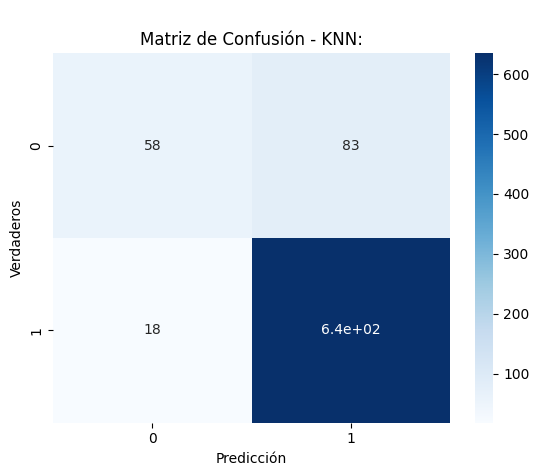

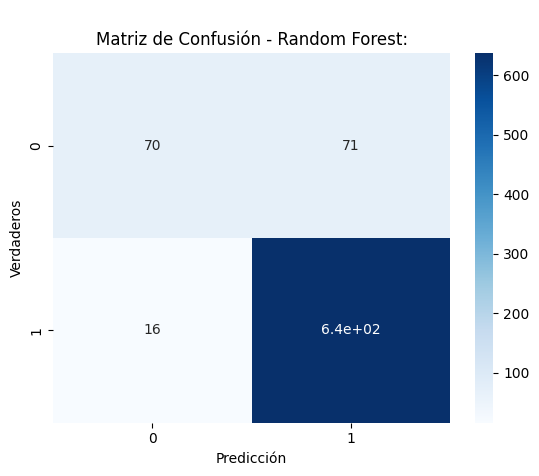

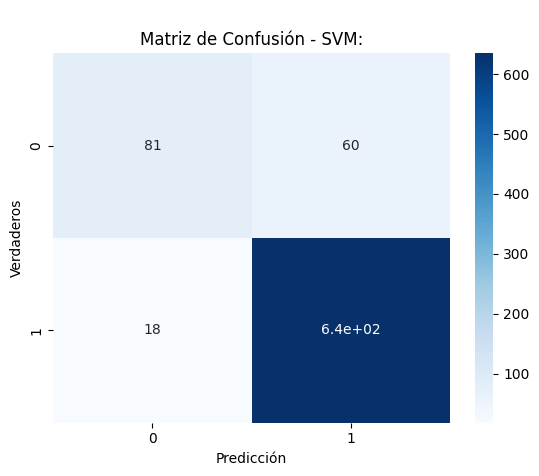

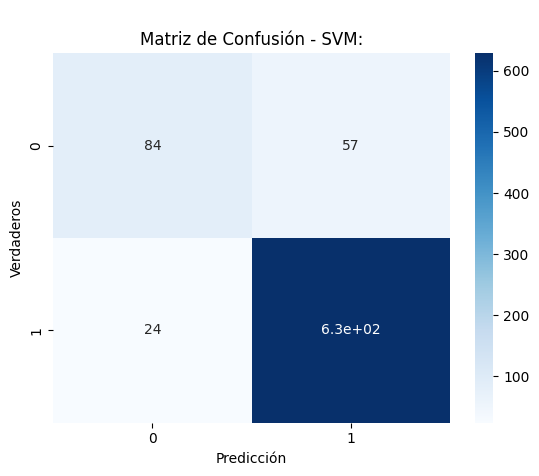

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión para cada clasificador
cm1 = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm1, annot=True, cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Verdaderos")
plt.title("\nMatriz de Confusión - KNN:")
plt.show()

# Matriz de confusión para cada clasificador
cm2 = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm2, annot=True, cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Verdaderos")
plt.title("\nMatriz de Confusión - Random Forest:")
plt.show()

# Matriz de confusión para cada clasificador
cm3 = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm3, annot=True, cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Verdaderos")
plt.title("\nMatriz de Confusión - SVM:")
plt.show()

# Matriz de confusión para cada clasificador
cm4 = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm4, annot=True, cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Verdaderos")
plt.title("\nMatriz de Confusión - SVM:")
plt.show()

In [25]:
from sklearn.model_selection import cross_val_score, GridSearchCV

# Validación cruzada para SVM
svm_cv_scores = cross_val_score(svm, X, y, cv=5)
svm_cv_mean = svm_cv_scores.mean()

svm_cv_mean

0.8442050466861432

### Hiperparametros con GridSearch

In [26]:
from tabulate import tabulate

def display_best_params_and_score(best_params_items, best_score, modelo_name):
    # Convertir best_params en una lista de listas para tabular
    params_table = [[key, value] for key, value in best_params_items]
    
    print(f"\nMejores Hiperparámetros para {modelo_name}:")

    # Imprimir best_params con tabulate
    print(tabulate(params_table, headers=["Hiperparámetro", "Mejor Valor"]))

    # Mostrar el mejor score
    print(f"\nMejor Score: {best_score}")

In [27]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import seaborn as sns
import joblib

# GridSearchCV para KNN
knn_params = {'n_neighbors': [3, 5, 7, 9, 11]}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_params_
knn_best_score = knn_grid.best_score_

# Guardar el modelo entrenado
joblib.dump(knn_grid.best_estimator_, '../models/cancer_survival_model-knn.pkl')

# GridSearchCV para Random Forest
rf_params = {
    'n_estimators': [50,100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar GridSearchCV
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy', n_jobs=-1)
# Ejecutar la búsqueda de hiperparámetros
rf_grid.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor score
best_rf = rf_grid.best_params_
rf_best_score = rf_grid.best_score_

# Guardar el modelo entrenado
joblib.dump(rf_grid.best_estimator_, '../models/cancer_survival_model-rf.pkl')

# GridSearchCV para SVM
#svm_params = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto']}
#svm_grid = GridSearchCV(SVC(kernel='linear', random_state=42), svm_params, cv=3, scoring='accuracy')
#svm_grid.fit(X_train, y_train)
#best_svm = svm_grid.best_params_
#svm_best_score = svm_grid.best_score_

# Guardar el modelo entrenado
#joblib.dump(svm_grid.best_estimator_, '../models/cancer_survival_model-svm.pkl')

# Definir los hiperparámetros para la búsqueda aleatoria para XGBoost
xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Configurar RandomizedSearchCV para XGBoost
xgb_random = RandomizedSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42), 
    xgb_params, 
    cv=3, 
    scoring='accuracy', 
    n_jobs=2, 
    n_iter=10,  # Número de combinaciones de parámetros a probar
    random_state=42
)

# Ejecutar la búsqueda de hiperparámetros para XGBoost
xgb_random.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor score para XGBoost de la búsqueda aleatoria
best_xgb_random = xgb_random.best_params_
xgb_random_best_score = xgb_random.best_score_

# Imprimir los mejores parámetros y scores de la búsqueda aleatoria
print("Best Random Search XGBoost params:", best_xgb_random, "with score:", xgb_random_best_score)

# Ahora realiza una búsqueda más fina alrededor de los mejores parámetros obtenidos de la búsqueda aleatoria
xgb_fine_params = {
    'n_estimators': np.arange(best_xgb_random['n_estimators']-20, best_xgb_random['n_estimators']+20, 10),
    'max_depth': [best_xgb_random['max_depth']-1, best_xgb_random['max_depth'], best_xgb_random['max_depth']+1],
    'learning_rate': [best_xgb_random['learning_rate']*0.5, best_xgb_random['learning_rate'], best_xgb_random['learning_rate']*1.5],
    'subsample': [max(0.1, best_xgb_random['subsample']-0.1), best_xgb_random['subsample'], min(1.0, best_xgb_random['subsample']+0.1)],
    'colsample_bytree': [max(0.1, best_xgb_random['colsample_bytree']-0.1), best_xgb_random['colsample_bytree'], min(1.0, best_xgb_random['colsample_bytree']+0.1)]
}

# Configurar GridSearchCV para XGBoost con un espacio de búsqueda más fino
xgb_grid = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42), 
    xgb_fine_params, 
    cv=3, 
    scoring='accuracy', 
    n_jobs=2
)

# Ejecutar la búsqueda de hiperparámetros más fina para XGBoost
xgb_grid.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor score para XGBoost de la búsqueda en cuadrícula fina
best_xgb = xgb_grid.best_params_
xgb_best_score = xgb_grid.best_score_

# Guardar el modelo entrenado para XGBoost
joblib.dump(xgb_grid.best_estimator_, '../models/cancer_survival_model-XGBoost.pkl')

Best Random Search XGBoost params: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 1.0} with score: 0.8908084082314228


['../models/cancer_survival_model-XGBoost.pkl']

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import joblib

# Definir los hiperparámetros a buscar
svm_params = {
    'C': [10, 100],
    'gamma': [ 0.001, 0.01, 'scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

# Crear el modelo GridSearchCV
svm_grid = GridSearchCV(SVC(random_state=42), svm_params, cv=5, scoring='accuracy')

# Ajustar el modelo a los datos de entrenamiento
svm_grid.fit(X_train, y_train)

# Obtener los mejores parámetros y la mejor puntuación
best_svm = svm_grid.best_params_
svm_best_score = svm_grid.best_score_

print("Mejores hiperparámetros:", best_svm)
print("Mejor puntuación de precisión:", svm_best_score)

# Guardar el modelo entrenado
joblib.dump(svm_grid.best_estimator_, '../models/cancer_survival_model-svm.pkl')

Mejores hiperparámetros: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Mejor puntuación de precisión: 0.894054054054054


['../models/cancer_survival_model-svm.pkl']

In [29]:
# Mostrar los mejores hiperparámetros y el mejor score
display_best_params_and_score(best_knn.items(), knn_best_score, 'KNN')
display_best_params_and_score(best_rf.items(), rf_best_score,'Radom Forest')
display_best_params_and_score(best_svm.items(), svm_best_score,'SVM')
display_best_params_and_score(best_xgb.items(), xgb_best_score,'XGBoost')



Mejores Hiperparámetros para KNN:
Hiperparámetro      Mejor Valor
----------------  -------------
n_neighbors                   9

Mejor Score: 0.8637837837837837

Mejores Hiperparámetros para Radom Forest:
Hiperparámetro       Mejor Valor
-----------------  -------------
max_depth                     20
min_samples_leaf               1
min_samples_split              5
n_estimators                  50

Mejor Score: 0.8794594594594596

Mejores Hiperparámetros para SVM:
Hiperparámetro    Mejor Valor
----------------  -------------
C                 100
gamma             0.001
kernel            rbf

Mejor Score: 0.894054054054054

Mejores Hiperparámetros para XGBoost:
Hiperparámetro      Mejor Valor
----------------  -------------
colsample_bytree           1
learning_rate              0.05
max_depth                 10
n_estimators             180
subsample                  0.9

Mejor Score: 0.8951339044531913


### Procederemos a generar curvas de aprendizaje para los tres modelos: KNN, Random Forest, SVM y XGBoost



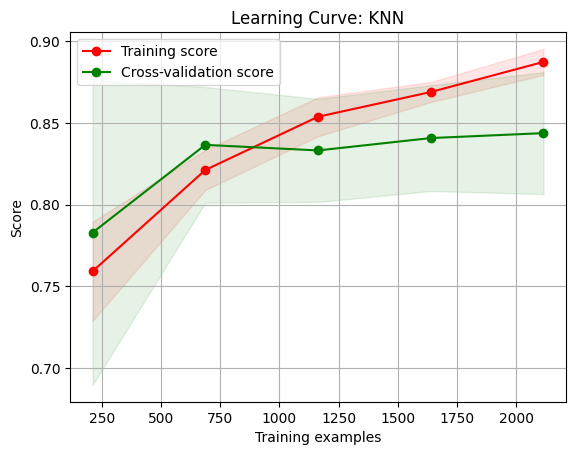

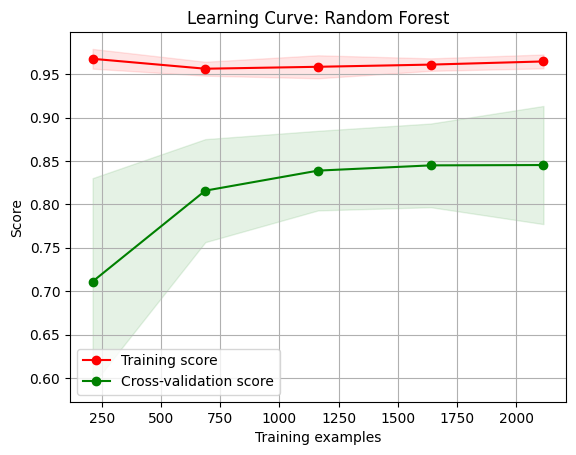

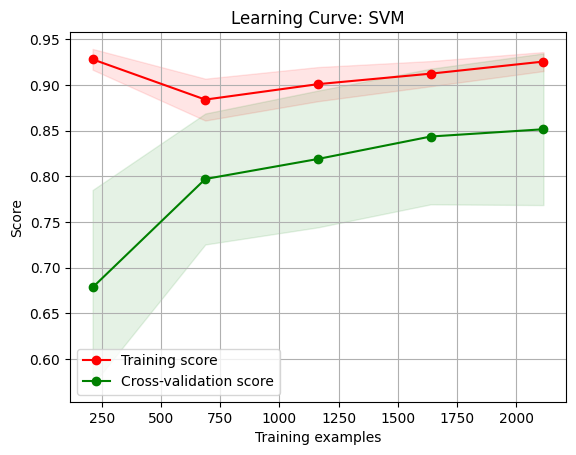

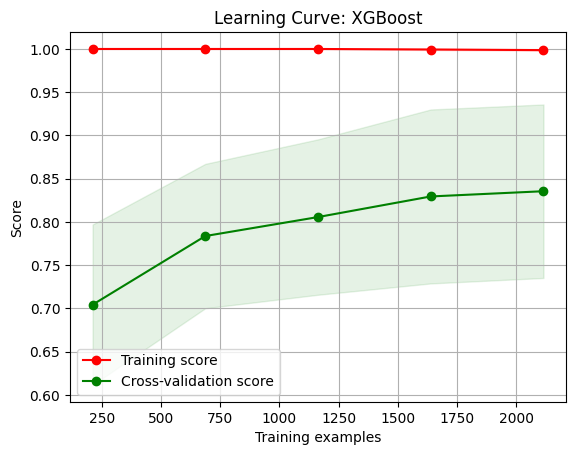

In [30]:
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy'
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Generar curvas de aprendizaje para los tres modelos
#plot_learning_curve(KNeighborsClassifier(n_neighbors=5), "Learning Curve: KNN", X, y, cv=5)
#plot_learning_curve(RandomForestClassifier(n_estimators=100, random_state=42), "Learning Curve: Random Forest", X, y, cv=5)
#plot_learning_curve(SVC(kernel='linear', random_state=42), "Learning Curve: SVM", X, y, cv=5)

# Cargar el mejor modelo de XGBoost desde el archivo
best_knn_model = joblib.load('../models/cancer_survival_model-knn.pkl')
best_rf_model = joblib.load('../models/cancer_survival_model-rf.pkl')
best_svm_model = joblib.load('../models/cancer_survival_model-svm.pkl')
best_xgb_model = joblib.load('../models/cancer_survival_model-XGBoost.pkl')


# Generar la curva de aprendizaje para el modelo de XGBoost
plot_learning_curve(best_knn_model, "Learning Curve: KNN", X, y, cv=5)
plot_learning_curve(best_rf_model, "Learning Curve: Random Forest", X, y, cv=5)
plot_learning_curve(best_svm_model, "Learning Curve: SVM", X, y, cv=5)
plot_learning_curve(best_xgb_model, "Learning Curve: XGBoost", X, y, cv=5)
plt.show()


### Características más importantes Random Forest

In [31]:
# Obtener las características más importantes
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Seleccionar las 10 características más importantes
top_features_indices = indices[:10]
top_features_importances = importances[top_features_indices]
top_features_names = X_train.columns[top_features_indices]

# Crear un DataFrame para visualizar las importancias
feature_importance_df = pd.DataFrame({
    'Feature': top_features_names,
    'Importance': top_features_importances
})

feature_importance_df


,Feature,Importance
0,DIAS_TRATAMIENTO_1,0.043619
1,DIAS_HASTA_INICIO_TRATAMIENTO,0.038302
2,INTENCION_TRATA_Paliativo,0.037656
3,DIAS_DESDE_NACIMIENTO_TRATAMIENTO_1,0.034649
4,DIAS_DESDE_NACIMIENTO_A_INGRESO,0.032931
5,RESPUESTA_TRATA_Enfermedad Progresiva,0.032456
6,EDAD,0.032168
7,DIAS_DESDE_NACIMIENTO_A_DIAGNO,0.031923
8,EXTENSION_NOM_Metástasis,0.031655
9,DIAS_DESDE_NACIMIENTO_TOM_MUESTRA,0.030313


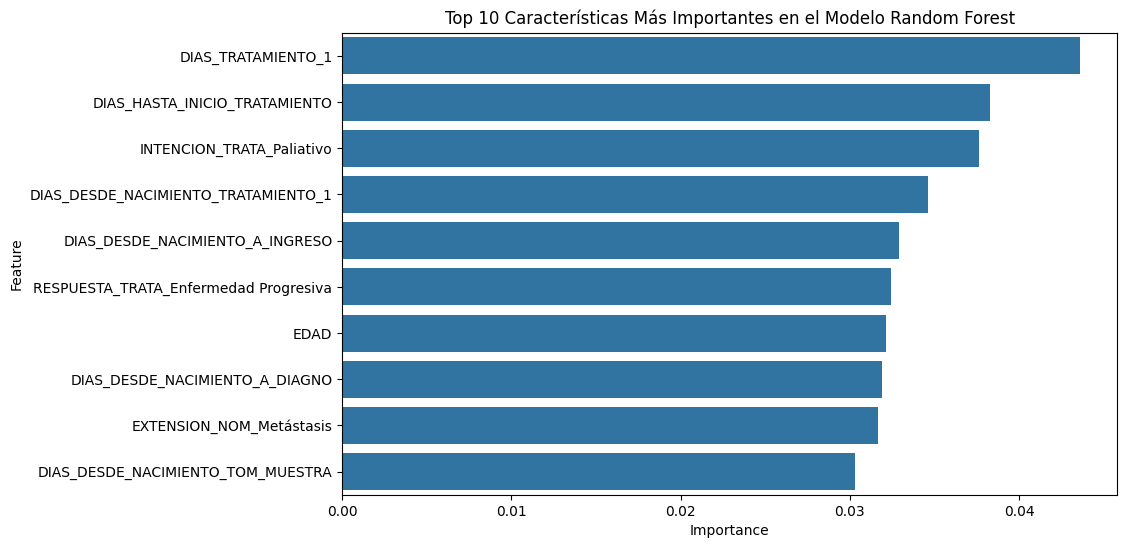

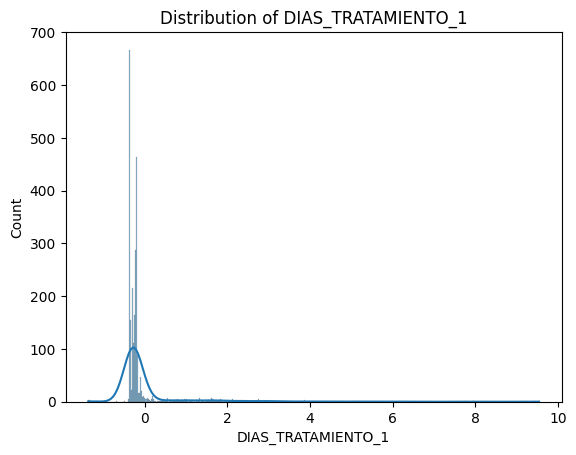

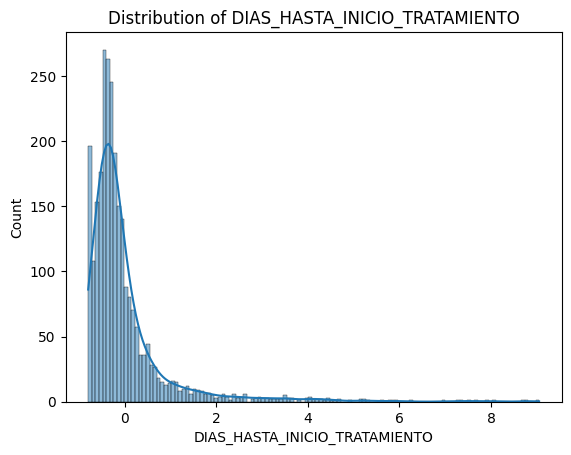

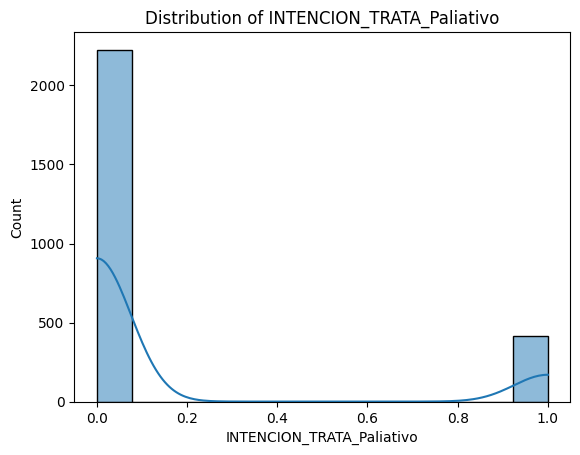

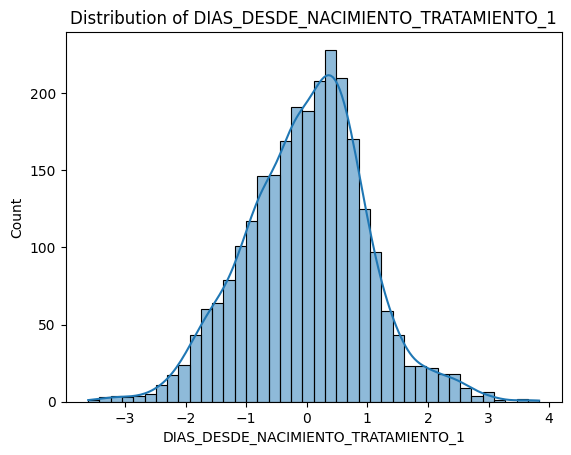

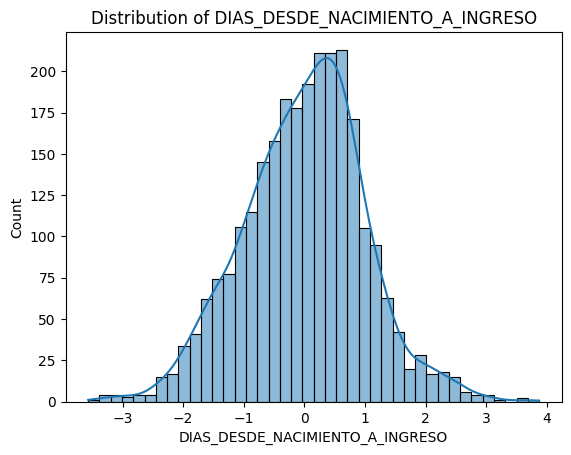

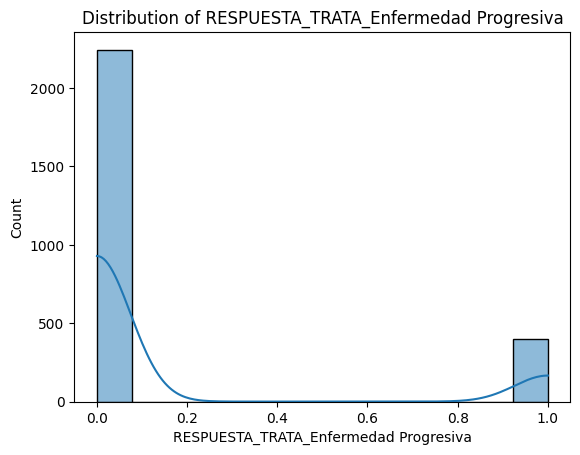

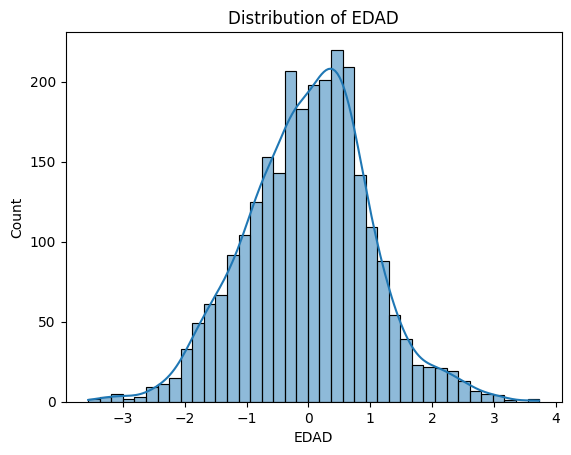

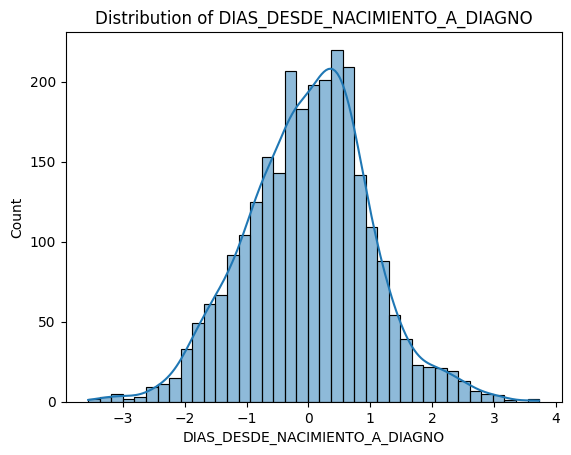

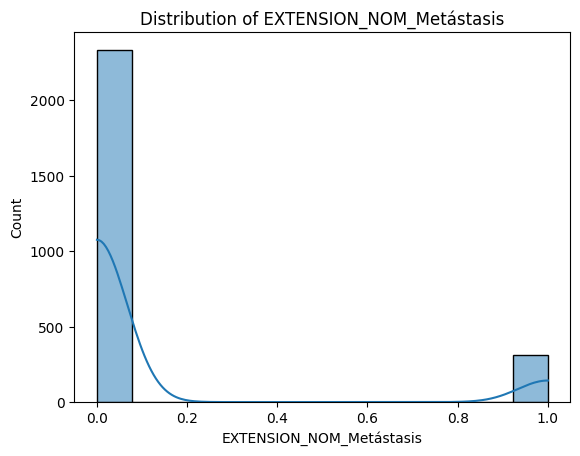

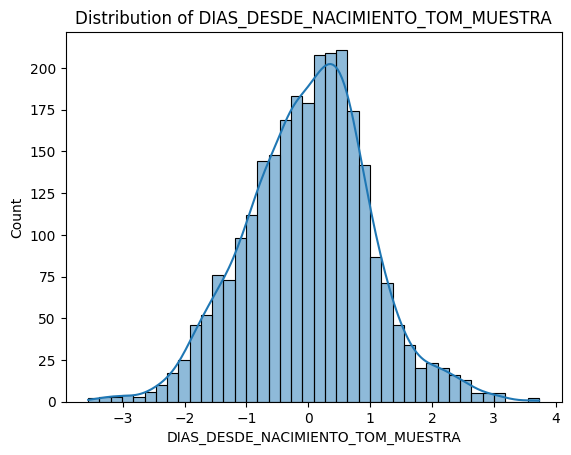

In [32]:
# Visualización de la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Top 10 Características Más Importantes en el Modelo Random Forest')
plt.show()

# Visualizar las distribuciones de las características más importantes
for feature in top_features_names:
    sns.histplot(df_encoded[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()